In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load datasets
dataframe_train = pd.read_csv('BATADAL_dataset04.csv')
dataframe_test = pd.read_csv('BATADAL_test_dataset.csv')

In [ ]:
def preprocess_data(dataframe, label_column_index):
    datetime_column = dataframe.iloc[:, 0]  # the first column is datetime
    dataframe = dataframe.drop(dataframe.columns[0], axis=1)

    # Replace -999 with 0
    dataframe = dataframe.replace(-999, 0)

    # Separate features and labels
    data = dataframe.drop(dataframe.columns[label_column_index], axis=1)
    labels = dataframe.iloc[:, label_column_index].astype(int)

    # Normalize features
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)

    return datetime_column, normalized_data, labels

# Preprocess datasets
_, train_data, train_labels = preprocess_data(dataframe_train, -1)
_, test_data, test_labels = preprocess_data(dataframe_test, -1)

In [ ]:
# Train Test Split
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [ ]:
# Hyperparameter Tuning with GridSearchCV for Random Forest

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'class_weight': ['balanced', None]  # To handle imbalanced classes
}

# GridSearchCV for RandomForest
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("\nBest parameters from GridSearchCV:")
print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_


Best parameters from GridSearchCV:
{'class_weight': None, 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
val_predictions = best_rf_model.predict(X_val)
print("\nValidation Set Metrics:")
print("Accuracy:", accuracy_score(y_val, val_predictions))
print("Precision:", precision_score(y_val, val_predictions))
print("Recall:", recall_score(y_val, val_predictions))
print("F1 Score:", f1_score(y_val, val_predictions))
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, val_predictions))


Validation Set Metrics:
Accuracy: 0.9736842105263158
Precision: 0.875
Recall: 0.525
F1 Score: 0.65625

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       796
           1       0.88      0.53      0.66        40

    accuracy                           0.97       836
   macro avg       0.93      0.76      0.82       836
weighted avg       0.97      0.97      0.97       836



In [ ]:
cross_val_scores = cross_val_score(best_rf_model, train_data, train_labels, cv=5)
print("\nCross-validation scores on the training set:")
print("Accuracy per fold:", cross_val_scores)
print("Mean cross-validation accuracy:", np.mean(cross_val_scores))


Cross-validation scores on the training set:
Accuracy per fold: [0.9437799  0.94856459 0.94730539 0.96646707 0.96287425]
Mean cross-validation accuracy: 0.9537982408388963


In [ ]:
best_rf_model.fit(train_data, train_labels)
test_predictions = best_rf_model.predict(test_data)

print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(test_labels, test_predictions))
print("Precision:", precision_score(test_labels, test_predictions))
print("Recall:", recall_score(test_labels, test_predictions))
print("F1 Score:", f1_score(test_labels, test_predictions))
print("\nClassification Report (Test Set):")
print(classification_report(test_labels, test_predictions))


Test Set Metrics:
Accuracy: 0.48635710866443277
Precision: 0.18346007604562736
Recall: 0.4742014742014742
F1 Score: 0.26456477039067855

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.49      0.61      1682
           1       0.18      0.47      0.26       407

    accuracy                           0.49      2089
   macro avg       0.49      0.48      0.43      2089
weighted avg       0.67      0.49      0.54      2089



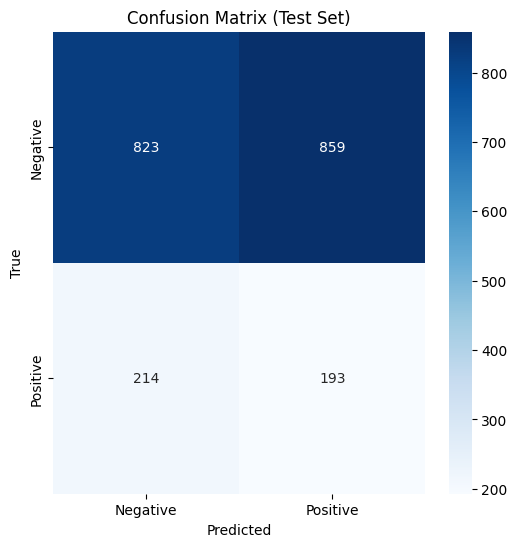

In [ ]:
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix (Test Set)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()